In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load predicted data
df = pd.read_csv("odisha_pm25_prediction.csv")

# Initialize map centered on Odisha
m = folium.Map(location=[20.5, 84.8], zoom_start=7)

# Prepare heatmap data: [lat, lon, PM2.5]
heat_data = [[row['lat'], row['lon'], row['PM2.5']] for index, row in df.iterrows()]

# Add HeatMap
HeatMap(heat_data, radius=10, blur=15, max_zoom=13).add_to(m)

# Save or show
m.save("odisha_pm25_heatmap.html")
m


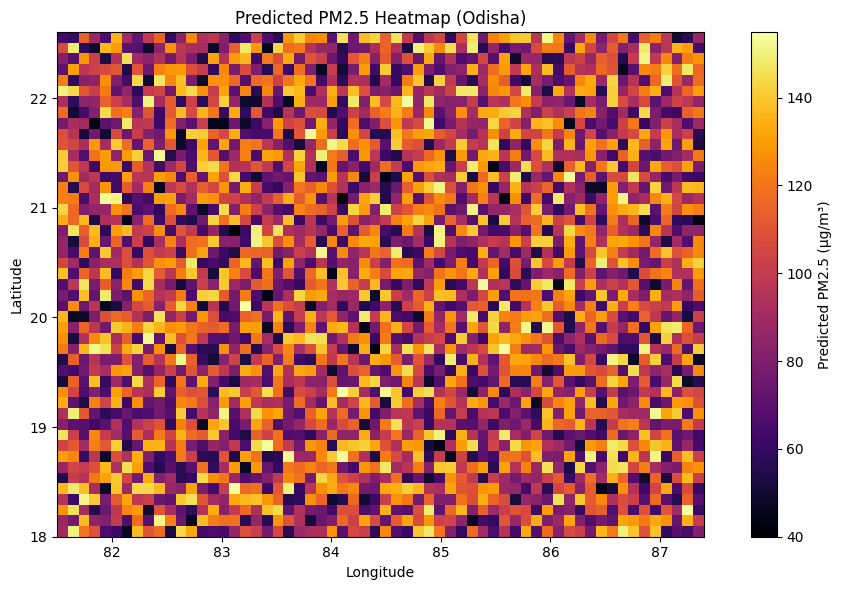

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Pivot to 2D grid (for plotting)
pivot = df.pivot(index='lat', columns='lon', values='PM2.5')
pm25_array = pivot.values[::-1]  # Flip to match map orientation

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(pm25_array, cmap='inferno',
           extent=[df['lon'].min(), df['lon'].max(), df['lat'].min(), df['lat'].max()])
plt.colorbar(label='Predicted PM2.5 (µg/m³)')
plt.title('Predicted PM2.5 Heatmap (Odisha)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()
